<a href="https://colab.research.google.com/github/obduliogonzalez/datanalysis_nogl/blob/main/DataAnalysis_Tips2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. LIBRERIAS

In [1]:
import os
## Gestión de imagenes
import cv2
## Gestión de datos
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## 1. Entendiendo el negocio

<a id="3"></a> <br>
# 2. EXPLORACIÓN DE DATOS (EDA)
La exploración de datos es el proceso de investigar, comprender y visualizar un conjunto de datos para obtener información significativa y revelar patrones, tendencias o anomalías que puedan estar presentes en los datos. Es una etapa fundamental en el análisis de datos que precede a la modelización y la toma de decisiones.

Aquí hay una descripción del proceso típico de exploración de datos:

1. Obtención de datos: El primer paso es recopilar los datos de diversas fuentes, como bases de datos, archivos CSV, hojas de cálculo, APIs, etc.
2. Revisión de la estructura de los datos: Se examina la estructura del conjunto de datos para comprender su formato, tamaño, características y tipos de variables (numéricas, categóricas, etc.).
3. Limpieza de datos: Se identifican y se manejan los datos faltantes, valores atípicos (outliers), errores y duplicados. Esto puede implicar imputar valores faltantes, corregir errores, eliminar duplicados y normalizar o escalar los datos según sea necesario.
4. Exploración estadística descriptiva: Se calculan estadísticas descriptivas básicas, como la media, la mediana, la desviación estándar, los valores mínimos y máximos, y los cuartiles, para comprender la distribución y la variabilidad de los datos.
5. Visualización de datos: Se utilizan diversas técnicas de visualización, como histogramas, diagramas de dispersión, diagramas de caja, gráficos de barras, y mapas de calor, para explorar las relaciones entre variables, detectar patrones, identificar tendencias y visualizar la distribución de los datos.
6. Análisis de correlación: Se analiza la correlación entre las variables para comprender cómo se relacionan entre sí. Esto puede implicar el cálculo de matrices de correlación y la visualización de mapas de calor de correlación.
7. Exploración de datos categóricos: Se exploran las variables categóricas utilizando tablas de frecuencia, gráficos de barras y diagramas de pastel para entender la distribución de las categorías y su relación con otras variables.
8. Análisis de datos temporales: Si los datos son temporales, se exploran patrones y tendencias a lo largo del tiempo utilizando gráficos de series temporales y análisis de estacionalidad y tendencias.
9. Identificación de patrones y anomalías: Se buscan patrones interesantes y anomalías en los datos que puedan proporcionar información útil o requerir una investigación adicional.
10. Documentación y presentación de resultados: Se documentan los hallazgos y los insights obtenidos durante la exploración de datos, y se presentan de manera clara y concisa utilizando visualizaciones y narrativas comprensibles.

Source :
https://es.wikipedia.org/wiki/An%C3%A1lisis_exploratorio_de_datos

In [2]:
#df = pd.read_csv("/content/drive/My Drive/Datasets/tips/tips.csv")
#df = pd.read_csv("/drive.google.com/drive/folders/stocks_daily_prices.csv")
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Ruta completa al archivo
file_path = '/content/drive/My Drive/Colab Notebooks/stocks_daily_returns.csv'

# Cargar el archivo CSV
df = pd.read_csv(file_path)

# Mostrar las primeras filas
print(df.head())



       Date      AAPL       JPM        PG        UAL
0  1/2/2008  0.000000  0.000000  0.000000   0.000000
1  1/3/2008  0.046203 -0.687708  0.000000  -0.750233
2  1/4/2008 -7.633517 -2.268378 -0.401072   4.409454
3  1/7/2008 -1.338518  1.001718  0.652615  -5.870973
4  1/8/2008 -3.597157 -3.967066  0.262103 -16.415356


## Entendiendo los datos

In [4]:
df.head(10)

,Date,AAPL,JPM,PG,UAL
0,1/2/2008,0.000000,0.000000,0.000000,0.000000
1,1/3/2008,0.046203,-0.687708,0.000000,-0.750233
2,1/4/2008,-7.633517,-2.268378,-0.401072,4.409454
3,1/7/2008,-1.338518,1.001718,0.652615,-5.870973
4,1/8/2008,-3.597157,-3.967066,0.262103,-16.415356
5,1/9/2008,4.759115,1.410539,-0.192640,6.724073
6,1/10/2008,-0.769237,2.657736,-0.082712,23.664993
7,1/11/2008,-2.994012,-1.137199,-3.173271,-0.372783
8,1/14/2008,3.526524,1.223702,0.156730,2.681636
9,1/15/2008,-5.447997,-5.294990,-0.839431,4.980259


In [5]:
df.tail(10)

,Date,AAPL,JPM,PG,UAL
3632,6/6/2022,0.522764,-0.330369,-0.390700,0.742737
3633,6/7/2022,1.758593,0.262092,1.114778,3.775698
3634,6/8/2022,-0.504337,-1.591456,-1.245407,-3.982782
3635,6/9/2022,-3.595571,-2.101564,-1.805523,-4.260085
3636,6/10/2022,-3.862868,-4.596596,-0.378980,-3.606559
3637,6/13/2022,-3.828484,-2.977838,-2.677001,-10.058308
3638,6/14/2022,0.667265,-1.663937,-3.119796,-0.081034
3639,6/15/2022,2.011147,1.183593,-0.993725,2.433084
3640,6/16/2022,-3.965145,-1.715625,0.611284,-8.207972
3641,6/17/2022,1.153314,-0.352642,-0.720077,4.312824


In [6]:
df.shape

(3642, 5)

In [7]:
df.isnull().sum()

,0
Date,0
AAPL,0
JPM,0
PG,0
UAL,0


In [8]:
df.duplicated().sum()

0

In [9]:
# Verificar que las fechas estén en orden ascendente
df['Date'] = pd.to_datetime(df['Date'])  # Asegurar el formato de fecha
print(df['Date'].is_monotonic_increasing)  # Debe devolver True




True


In [10]:
duplicates = df[df.duplicated(subset=['Date', 'AAPL'], keep=False)]
print(duplicates)


Empty DataFrame
Columns: [Date, AAPL, JPM, PG, UAL]
Index: []


In [11]:
df.dtypes

,0
Date,datetime64[ns]
AAPL,float64
JPM,float64
PG,float64
UAL,float64


In [12]:
print(df.columns)

# Ejemplo: Relación entre AAPL y JPM en porcentaje
df["AAPL_JPM_ratio"] = (df["AAPL"] / df["JPM"]) * 100
print(df.head(10))


Index(['Date', 'AAPL', 'JPM', 'PG', 'UAL'], dtype='object')
        Date      AAPL       JPM        PG        UAL  AAPL_JPM_ratio
0 2008-01-02  0.000000  0.000000  0.000000   0.000000             NaN
1 2008-01-03  0.046203 -0.687708  0.000000  -0.750233       -6.718467
2 2008-01-04 -7.633517 -2.268378 -0.401072   4.409454      336.518682
3 2008-01-07 -1.338518  1.001718  0.652615  -5.870973     -133.622253
4 2008-01-08 -3.597157 -3.967066  0.262103 -16.415356       90.675513
5 2008-01-09  4.759115  1.410539 -0.192640   6.724073      337.397028
6 2008-01-10 -0.769237  2.657736 -0.082712  23.664993      -28.943302
7 2008-01-11 -2.994012 -1.137199 -3.173271  -0.372783      263.279598
8 2008-01-14  3.526524  1.223702  0.156730   2.681636      288.184808
9 2008-01-15 -5.447997 -5.294990 -0.839431   4.980259      102.889659


In [13]:
df.describe()

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,Date,AAPL,JPM,PG,UAL,AAPL_JPM_ratio
count,3642,3642.000000,3642.000000,3642.000000,3642.000000,3641.000000
mean,2015-03-26 07:31:31.927512576,0.105180,0.069331,0.035579,0.098866,NaN
min,2008-01-02 00:00:00,-17.919513,-20.727418,-8.737353,-36.770882,-inf
25%,2011-08-11 06:00:00,-0.797108,-0.889705,-0.482903,-1.553845,-52.966484
50%,2015-03-26 12:00:00,0.099403,0.017241,0.037285,0.016636,35.543193
75%,2018-11-04 06:00:00,1.129585,1.002644,0.595436,1.636975,125.942183
max,2022-06-17 00:00:00,13.904950,25.096737,12.009046,68.537079,inf
std,NaN,2.003500,2.559122,1.198977,4.361402,NaN


In [14]:
df.describe().T

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,count,mean,min,25%,50%,75%,max,std
Date,3642,2015-03-26 07:31:31.927512576,2008-01-02 00:00:00,2011-08-11 06:00:00,2015-03-26 12:00:00,2018-11-04 06:00:00,2022-06-17 00:00:00,NaN
AAPL,3642.0,0.10518,-17.919513,-0.797108,0.099403,1.129585,13.90495,2.0035
JPM,3642.0,0.069331,-20.727418,-0.889705,0.017241,1.002644,25.096737,2.559122
PG,3642.0,0.035579,-8.737353,-0.482903,0.037285,0.595436,12.009046,1.198977
UAL,3642.0,0.098866,-36.770882,-1.553845,0.016636,1.636975,68.537079,4.361402
AAPL_JPM_ratio,3641.0,NaN,-inf,-52.966484,35.543193,125.942183,inf,NaN


In [15]:
print(df.dtypes)

df['Date'] = df['Date'].astype('object')

#df.describe(include='object').T

Date              datetime64[ns]
AAPL                     float64
JPM                      float64
PG                       float64
UAL                      float64
AAPL_JPM_ratio           float64
dtype: object


In [16]:
df['AAPL_Category'] = pd.cut(df['AAPL'], bins=3, labels=['Low', 'Medium', 'High'])
print(df['AAPL_Category'].value_counts())


AAPL_Category
Medium    3469
High       160
Low         13
Name: count, dtype: int64


In [17]:
print (df["Date"].unique())
print (df["AAPL"].unique())
print (df["JPM"].unique())
print (df["PG"].unique())
print (df["UAL"].unique())
print (df["AAPL_JPM_ratio"].unique())

[Timestamp('2008-01-02 00:00:00') Timestamp('2008-01-03 00:00:00')
 Timestamp('2008-01-04 00:00:00') ... Timestamp('2022-06-15 00:00:00')
 Timestamp('2022-06-16 00:00:00') Timestamp('2022-06-17 00:00:00')]
[ 0.          0.04620341 -7.63351728 ...  2.01114666 -3.96514464
  1.15331388]
[ 0.         -0.68770764 -2.26837846 ...  1.18359296 -1.71562545
 -0.35264172]
[ 0.         -0.40107191  0.65261545 ... -0.99372522  0.61128431
 -0.72007699]
[ 0.         -0.75023282  4.40945415 ...  2.43308372 -8.20797218
  4.31282361]
[          nan   -6.71846743  336.51868172 ...  169.91877574  231.11948087
 -327.04975721]


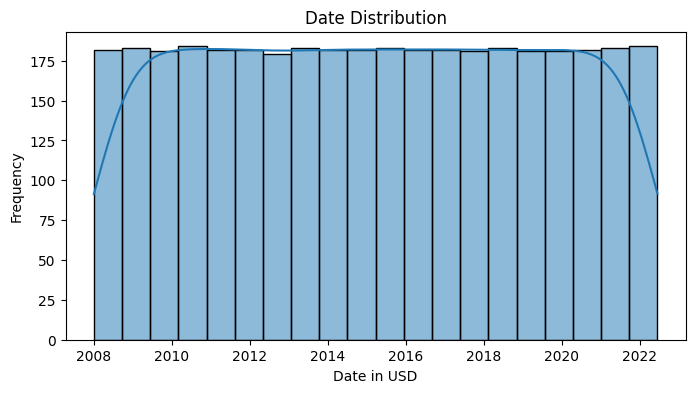

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Date"], kde=True, bins=20)
plt.title("Date Distribution")
plt.xlabel("Date in USD")
plt.ylabel("Frequency")
plt.show()

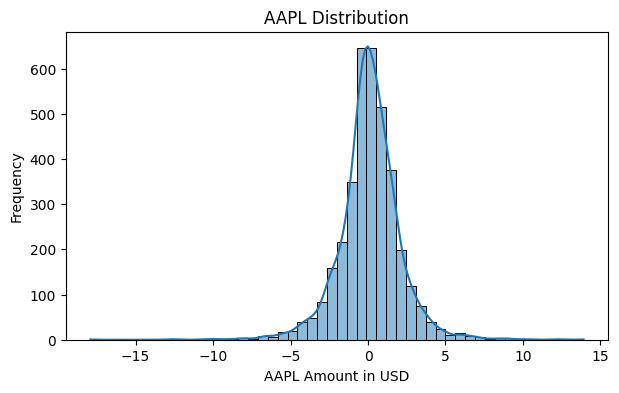

In [19]:
plt.figure(figsize=(7, 4))
sns.histplot(df["AAPL"], kde=True, bins=50)
plt.title("AAPL Distribution")
plt.xlabel("AAPL Amount in USD")
plt.ylabel("Frequency")
plt.show()

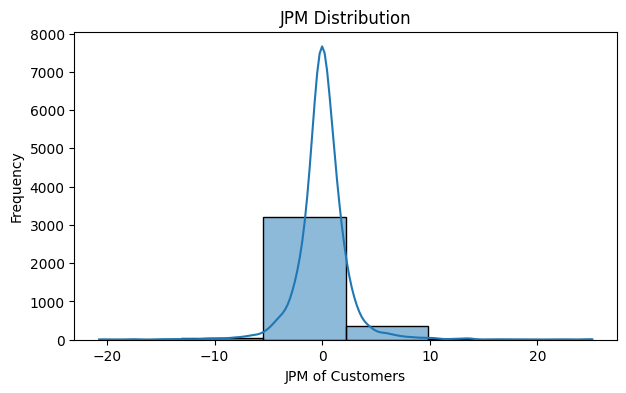

In [20]:
plt.figure(figsize=(7, 4))
sns.histplot(df["JPM"], kde=True, bins=6)
plt.title("JPM Distribution")
plt.xlabel("JPM of Customers")
plt.ylabel("Frequency")
plt.show()

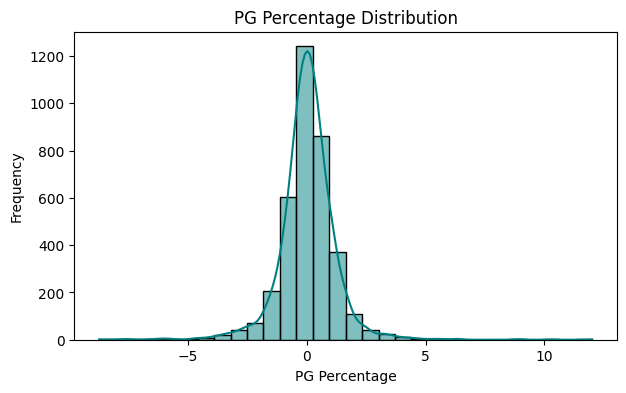

In [21]:
plt.figure(figsize=(7, 4))
sns.histplot(df["PG"], kde=True, bins=30, color='teal')
plt.title("PG Percentage Distribution")
plt.xlabel("PG Percentage")
plt.ylabel("Frequency")
plt.show()

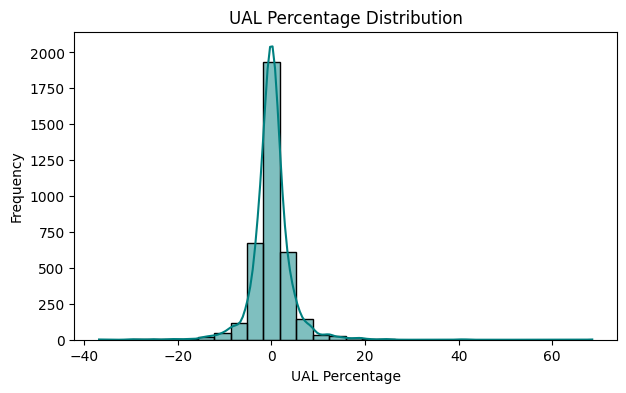

In [22]:
plt.figure(figsize=(7, 4))
sns.histplot(df["UAL"], kde=True, bins=30, color='teal')
plt.title("UAL Percentage Distribution")
plt.xlabel("UAL Percentage")
plt.ylabel("Frequency")
plt.show()

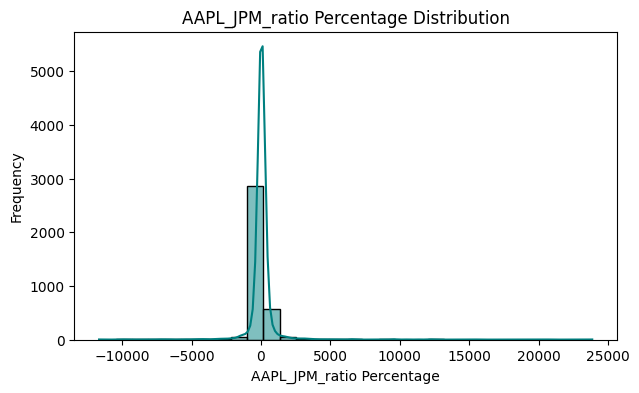

In [23]:
plt.figure(figsize=(7, 4))
sns.histplot(df["AAPL_JPM_ratio"], kde=True, bins=30, color='teal')
plt.title("AAPL_JPM_ratio Percentage Distribution")
plt.xlabel("AAPL_JPM_ratio Percentage")
plt.ylabel("Frequency")
plt.show()

<ipython-input-24-501ae92a87ed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Date', data=df, palette='viridis')


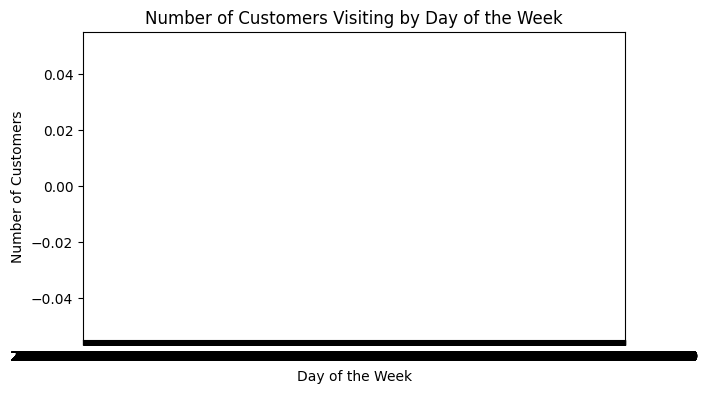

In [24]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Date', data=df, palette='viridis')
plt.title("Number of Customers Visiting by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Customers")
plt.show()

<ipython-input-25-930e41ffa55c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekday', data=df, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


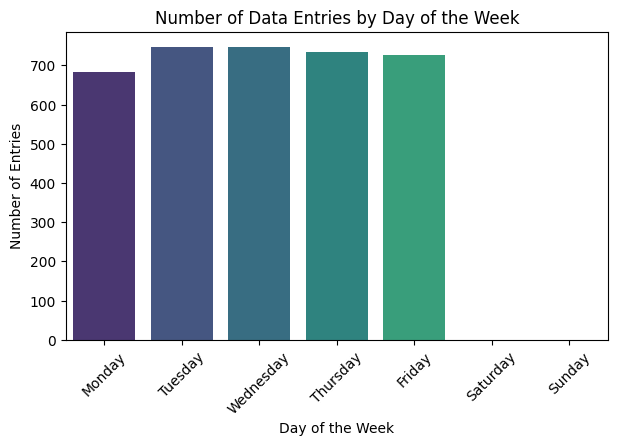

In [25]:
# Crear una nueva columna para el día de la semana
df['Weekday'] = pd.to_datetime(df['Date']).dt.day_name()

# Graficar la cantidad de datos agrupados por el día de la semana
plt.figure(figsize=(7, 4))
sns.countplot(x='Weekday', data=df, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Number of Data Entries by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Entries")
plt.xticks(rotation=45)
plt.show()


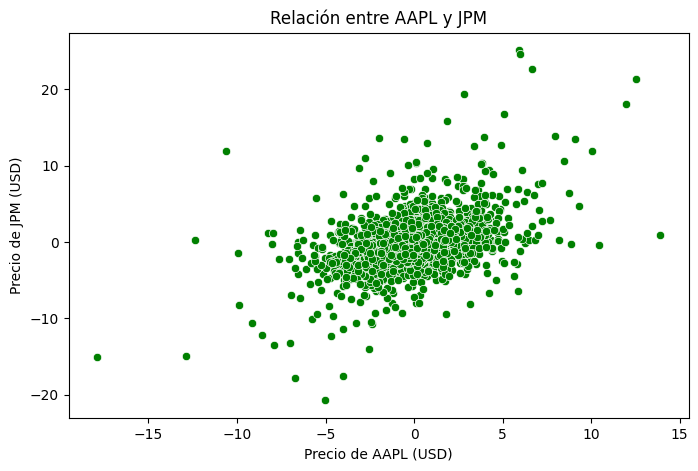

In [26]:
# Importar las bibliotecas necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfica de dispersión entre AAPL y JPM
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['AAPL'], y=df['JPM'], color='green')
plt.title('Relación entre AAPL y JPM')
plt.xlabel('Precio de AAPL (USD)')
plt.ylabel('Precio de JPM (USD)')
plt.show()


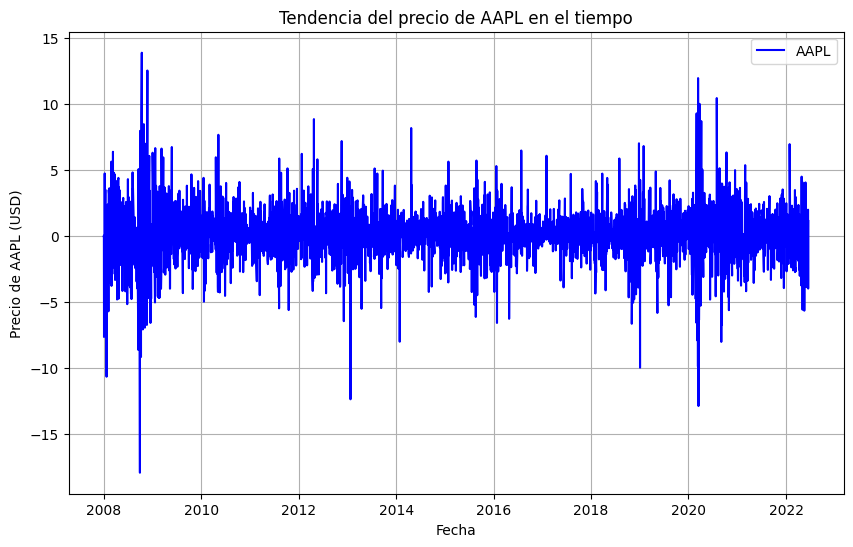

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['AAPL'], label='AAPL', color='blue')
plt.title('Tendencia del precio de AAPL en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio de AAPL (USD)')
plt.legend()
plt.grid(True)
plt.show()


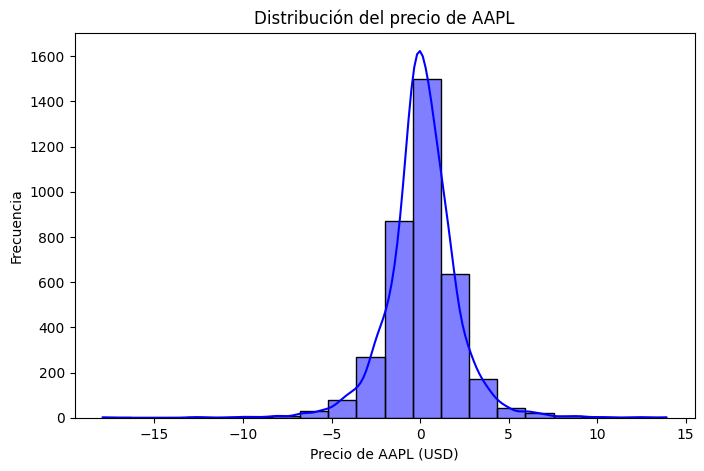

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(df['AAPL'], kde=True, bins=20, color='blue')
plt.title('Distribución del precio de AAPL')
plt.xlabel('Precio de AAPL (USD)')
plt.ylabel('Frecuencia')
plt.show()


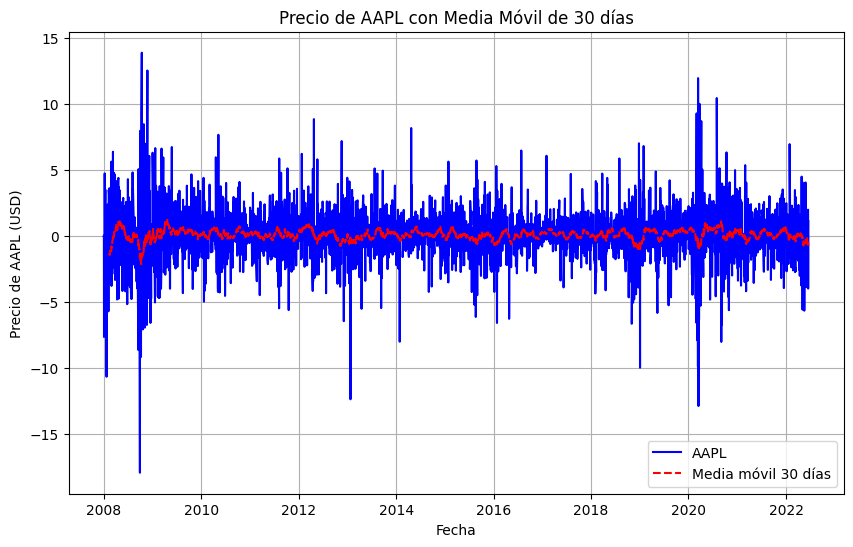

In [29]:
df['AAPL_30D_MA'] = df['AAPL'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['AAPL'], label='AAPL', color='blue')
plt.plot(df['Date'], df['AAPL_30D_MA'], label='Media móvil 30 días', color='red', linestyle='--')
plt.title('Precio de AAPL con Media Móvil de 30 días')
plt.xlabel('Fecha')
plt.ylabel('Precio de AAPL (USD)')
plt.legend()
plt.grid(True)
plt.show()


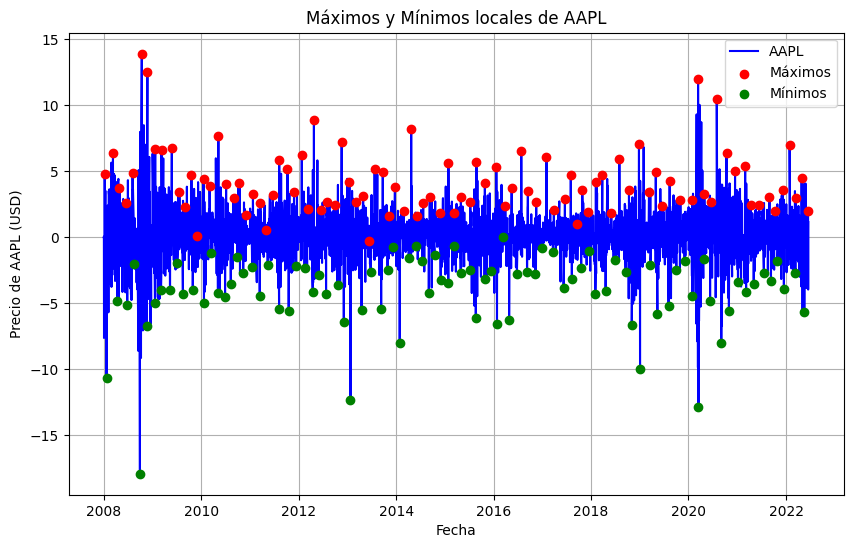

In [30]:
from scipy.signal import find_peaks

# Encontrar máximos locales
peaks, _ = find_peaks(df['AAPL'], distance=30)
# Encontrar mínimos locales (invertir la señal)
valleys, _ = find_peaks(-df['AAPL'], distance=30)

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['AAPL'], label='AAPL', color='blue')
plt.scatter(df['Date'].iloc[peaks], df['AAPL'].iloc[peaks], color='red', label='Máximos', zorder=5)
plt.scatter(df['Date'].iloc[valleys], df['AAPL'].iloc[valleys], color='green', label='Mínimos', zorder=5)
plt.title('Máximos y Mínimos locales de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio de AAPL (USD)')
plt.legend()
plt.grid(True)
plt.show()


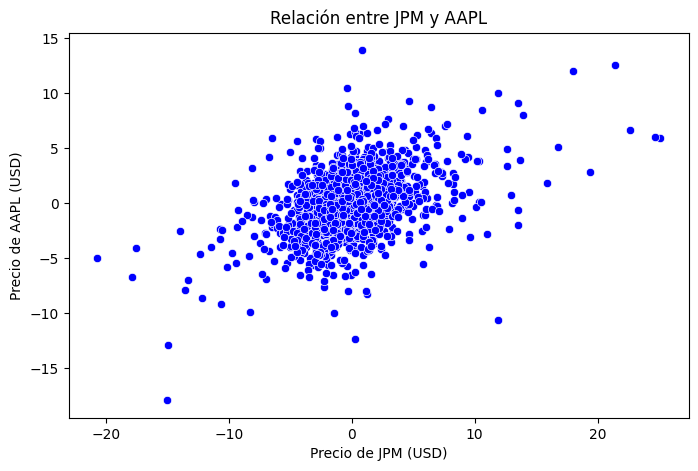

In [31]:


# Gráfica de dispersión entre JPM y AAPL
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['JPM'], y=df['AAPL'], color='blue')
plt.title('Relación entre JPM y AAPL')
plt.xlabel('Precio de JPM (USD)')
plt.ylabel('Precio de AAPL (USD)')
plt.show()


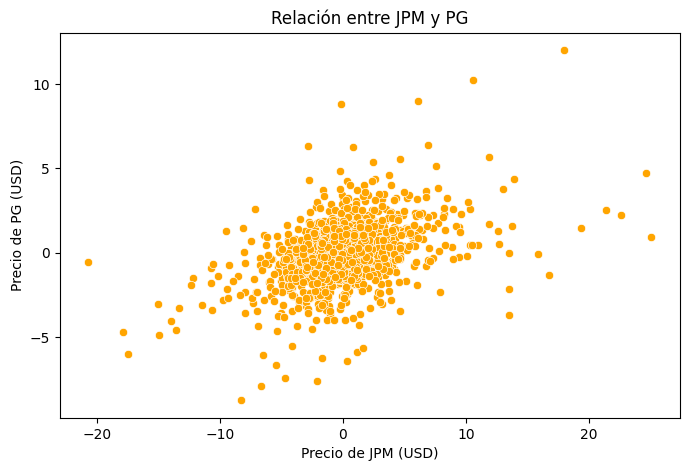

In [32]:
# Gráfica de dispersión entre JPM y PG
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['JPM'], y=df['PG'], color='orange')
plt.title('Relación entre JPM y PG')
plt.xlabel('Precio de JPM (USD)')
plt.ylabel('Precio de PG (USD)')
plt.show()


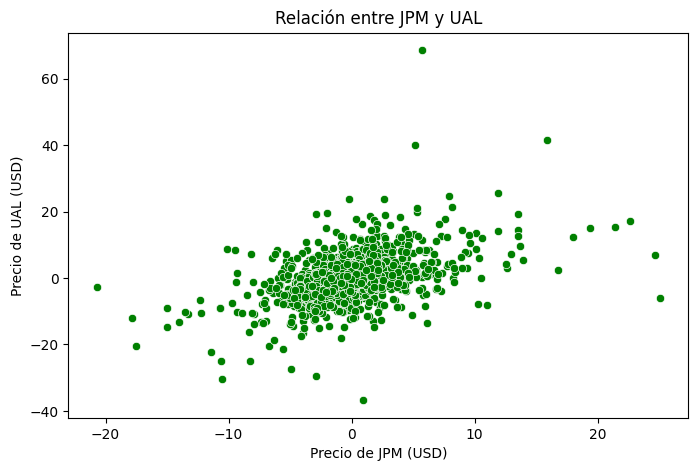

In [33]:
# Gráfica de dispersión entre JPM y UAL
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['JPM'], y=df['UAL'], color='green')
plt.title('Relación entre JPM y UAL')
plt.xlabel('Precio de JPM (USD)')
plt.ylabel('Precio de UAL (USD)')
plt.show()


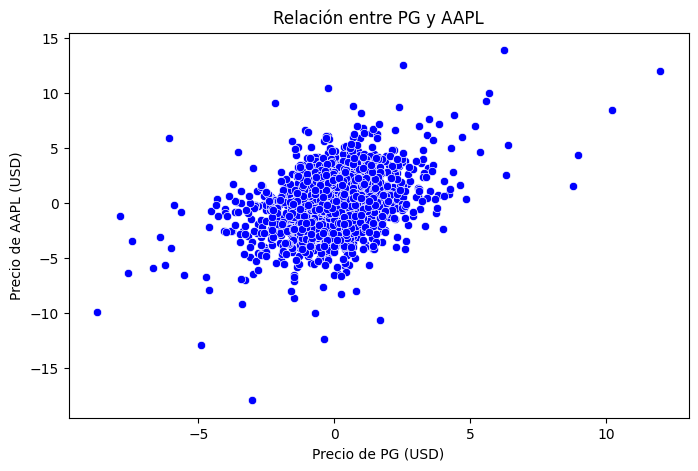

In [34]:
# Gráfica de dispersión entre PG y AAPL
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['PG'], y=df['AAPL'], color='blue')
plt.title('Relación entre PG y AAPL')
plt.xlabel('Precio de PG (USD)')
plt.ylabel('Precio de AAPL (USD)')
plt.show()


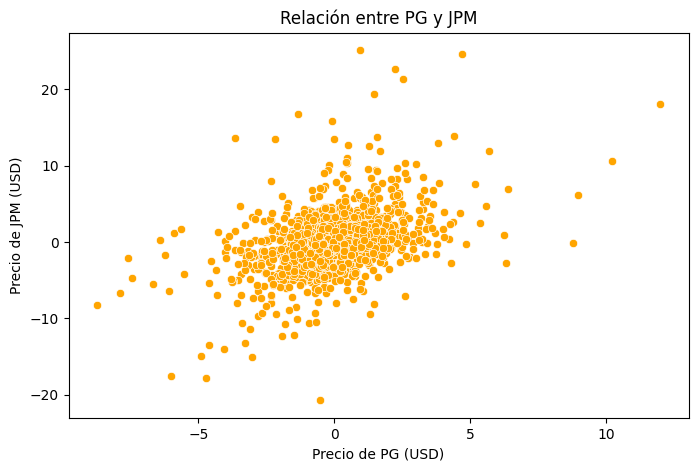

In [35]:
# Gráfica de dispersión entre PG y JPM
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['PG'], y=df['JPM'], color='orange')
plt.title('Relación entre PG y JPM')
plt.xlabel('Precio de PG (USD)')
plt.ylabel('Precio de JPM (USD)')
plt.show()


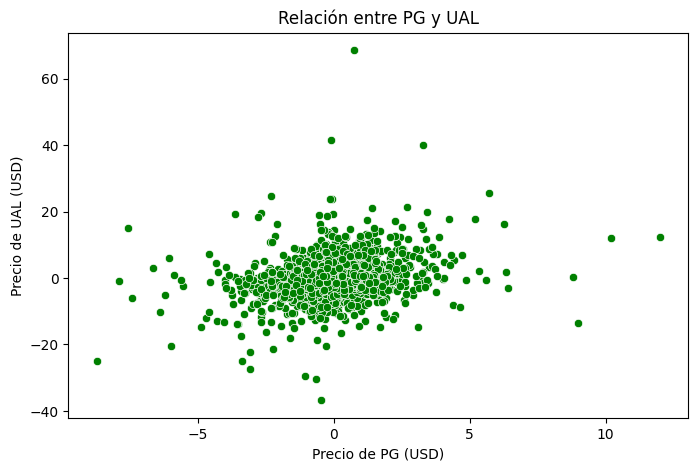

In [36]:
# Gráfica de dispersión entre PG y UAL
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['PG'], y=df['UAL'], color='green')
plt.title('Relación entre PG y UAL')
plt.xlabel('Precio de PG (USD)')
plt.ylabel('Precio de UAL (USD)')
plt.show()


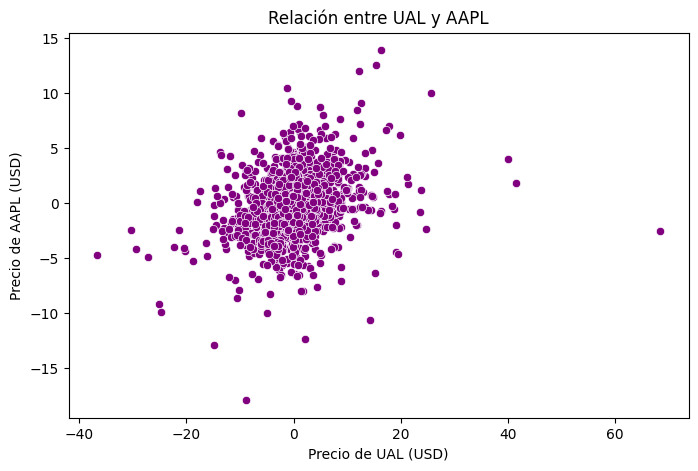

In [37]:
# Gráfica de dispersión entre UAL y AAPL
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['UAL'], y=df['AAPL'], color='purple')
plt.title('Relación entre UAL y AAPL')
plt.xlabel('Precio de UAL (USD)')
plt.ylabel('Precio de AAPL (USD)')
plt.show()


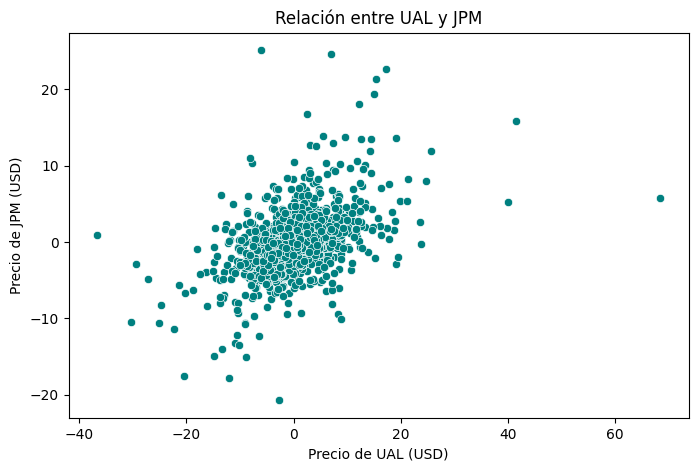

In [38]:
# Gráfica de dispersión entre UAL y JPM
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['UAL'], y=df['JPM'], color='teal')
plt.title('Relación entre UAL y JPM')
plt.xlabel('Precio de UAL (USD)')
plt.ylabel('Precio de JPM (USD)')
plt.show()


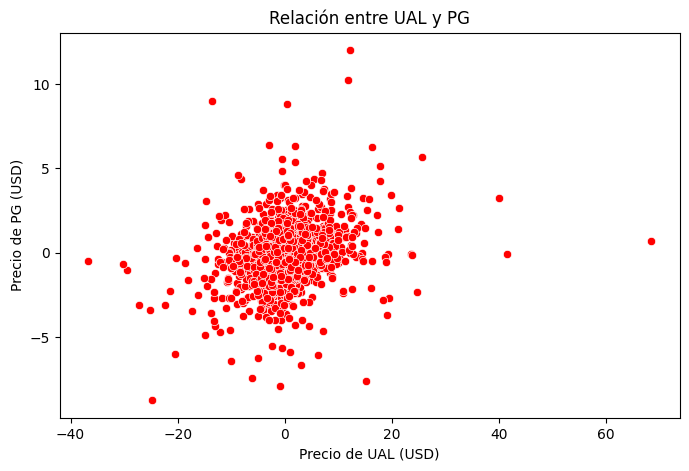

In [39]:
# Gráfica de dispersión entre UAL y PG
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['UAL'], y=df['PG'], color='red')
plt.title('Relación entre UAL y PG')
plt.xlabel('Precio de UAL (USD)')
plt.ylabel('Precio de PG (USD)')
plt.show()


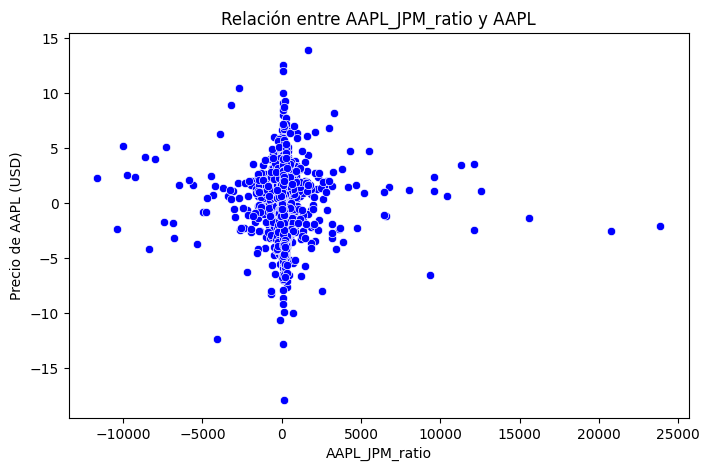

In [40]:
# Gráfica de dispersión entre AAPL_JPM_ratio y AAPL
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['AAPL_JPM_ratio'], y=df['AAPL'], color='blue')
plt.title('Relación entre AAPL_JPM_ratio y AAPL')
plt.xlabel('AAPL_JPM_ratio')
plt.ylabel('Precio de AAPL (USD)')
plt.show()


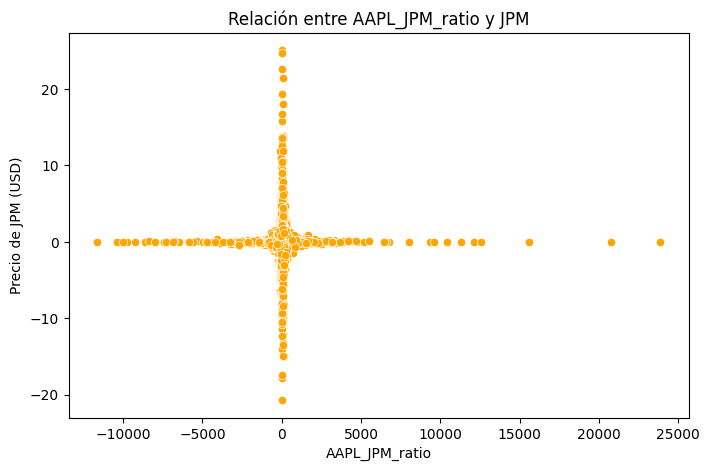

In [41]:
# Gráfica de dispersión entre AAPL_JPM_ratio y JPM
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['AAPL_JPM_ratio'], y=df['JPM'], color='orange')
plt.title('Relación entre AAPL_JPM_ratio y JPM')
plt.xlabel('AAPL_JPM_ratio')
plt.ylabel('Precio de JPM (USD)')
plt.show()


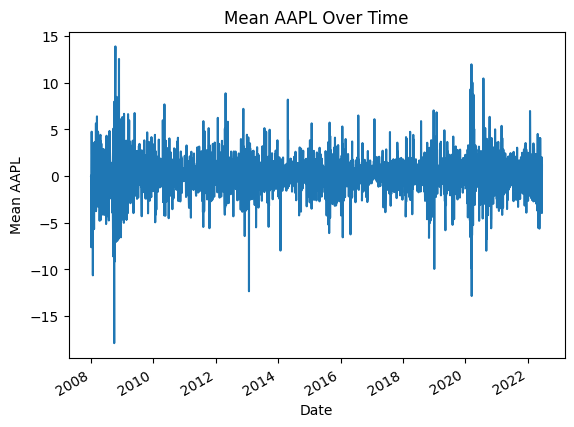

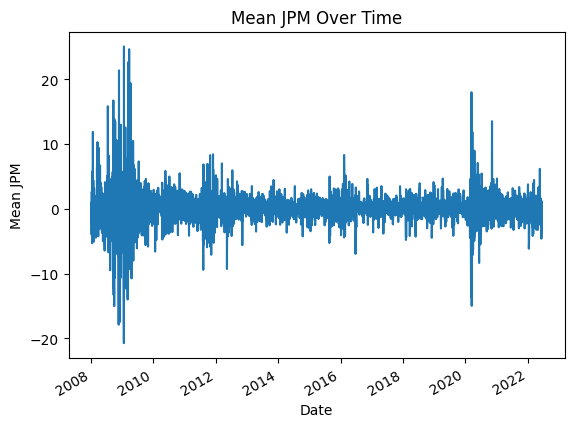

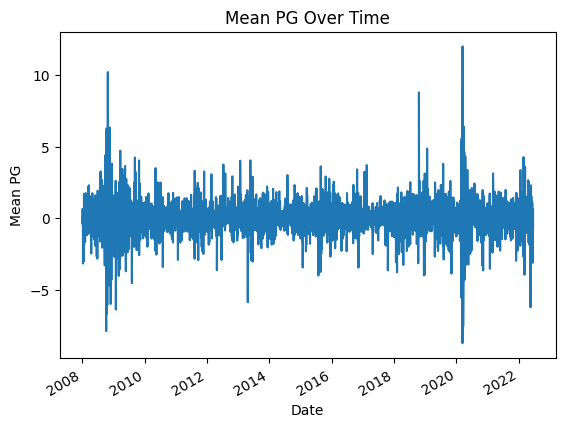

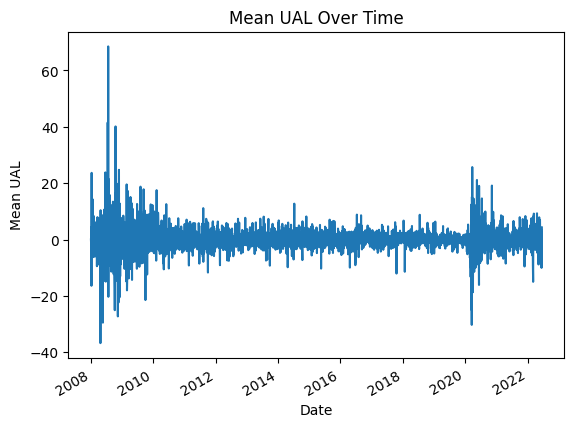

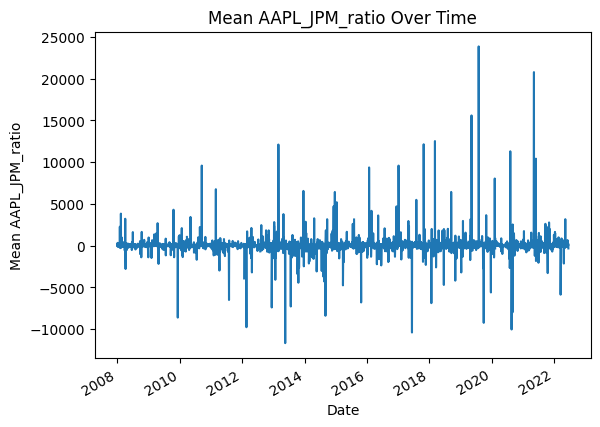

In [42]:
# Lista de columnas a trabajar
columns_to_plot = ['AAPL', 'JPM', 'PG', 'UAL', 'AAPL_JPM_ratio']

# Crear gráficos de las medias de las columnas seleccionadas
for col in columns_to_plot:
    df.groupby('Date')[col].mean().plot(kind='line', title=f'Mean {col} Over Time', ylabel=f'Mean {col}')
    plt.xlabel('Date')
    plt.show()


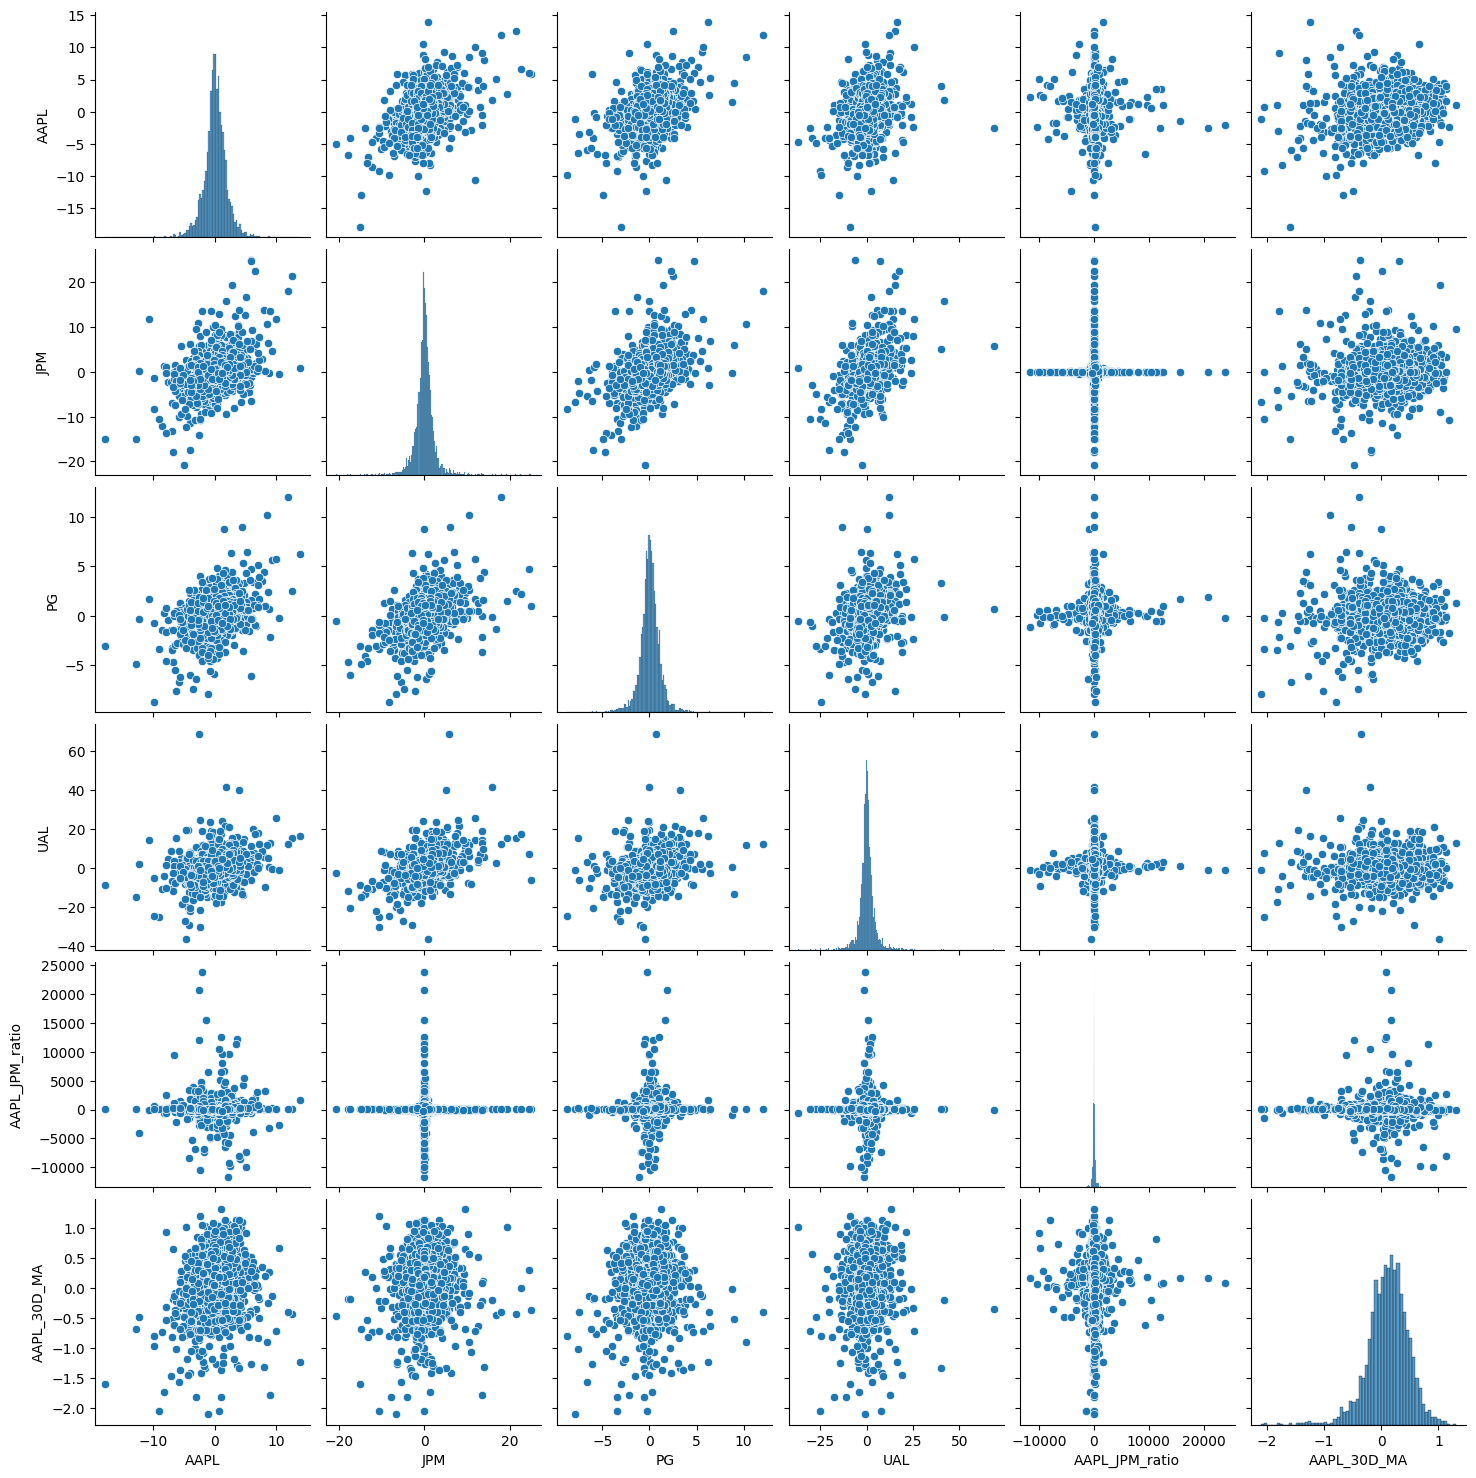

In [43]:
sns.pairplot(df)
plt.show()

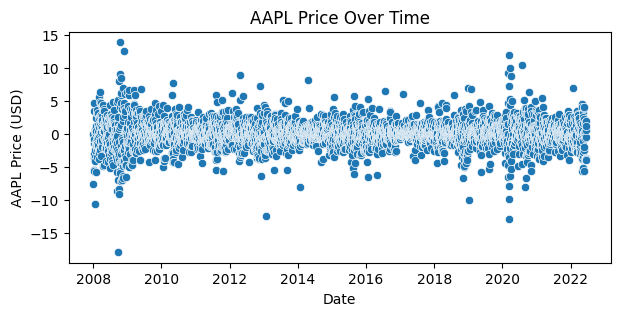

In [44]:
plt.figure(figsize=(7, 3))
sns.scatterplot(x="Date", y="AAPL", data=df)
plt.title("AAPL Price Over Time")
plt.xlabel("Date")
plt.ylabel("AAPL Price (USD)")
plt.show()


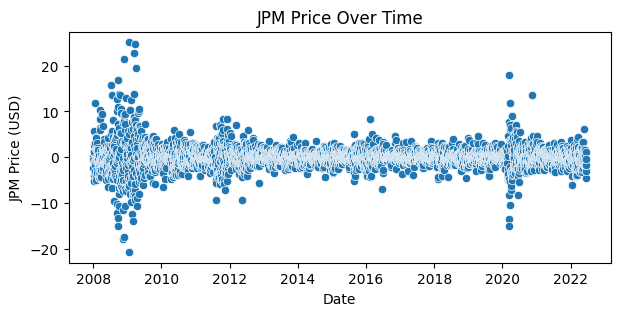

In [45]:
plt.figure(figsize=(7, 3))
sns.scatterplot(x="Date", y="JPM", data=df)
plt.title("JPM Price Over Time")
plt.xlabel("Date")
plt.ylabel("JPM Price (USD)")
plt.show()


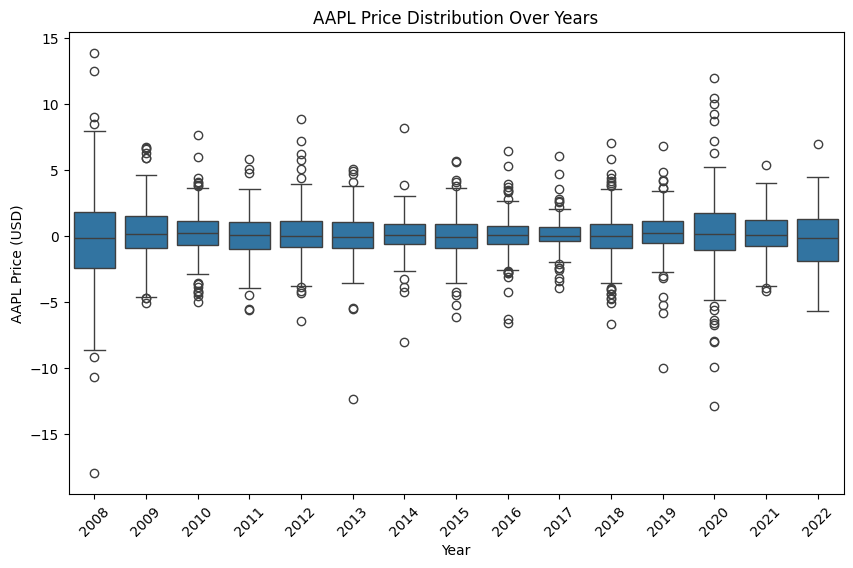

In [46]:
# Convertir la columna 'Date' al formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Crear una nueva columna de año a partir de la fecha
df['Year'] = df['Date'].dt.year

# Generar el boxplot agrupado por año
plt.figure(figsize=(10, 6))
sns.boxplot(x="Year", y="AAPL", data=df)
plt.title("AAPL Price Distribution Over Years")
plt.xlabel("Year")
plt.ylabel("AAPL Price (USD)")
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.show()


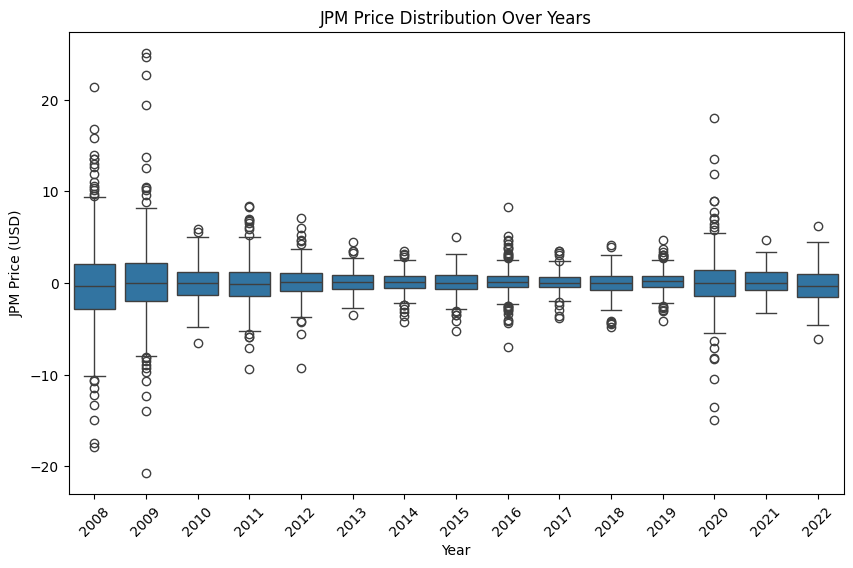

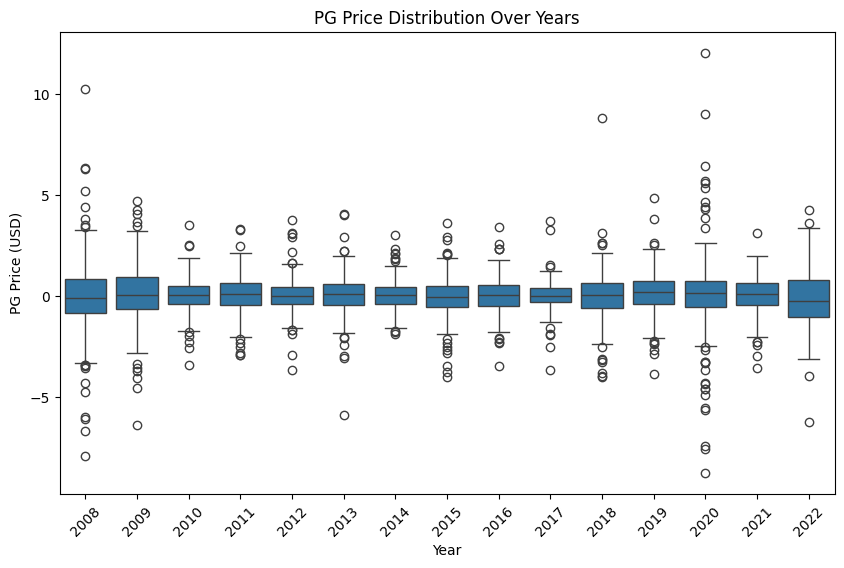

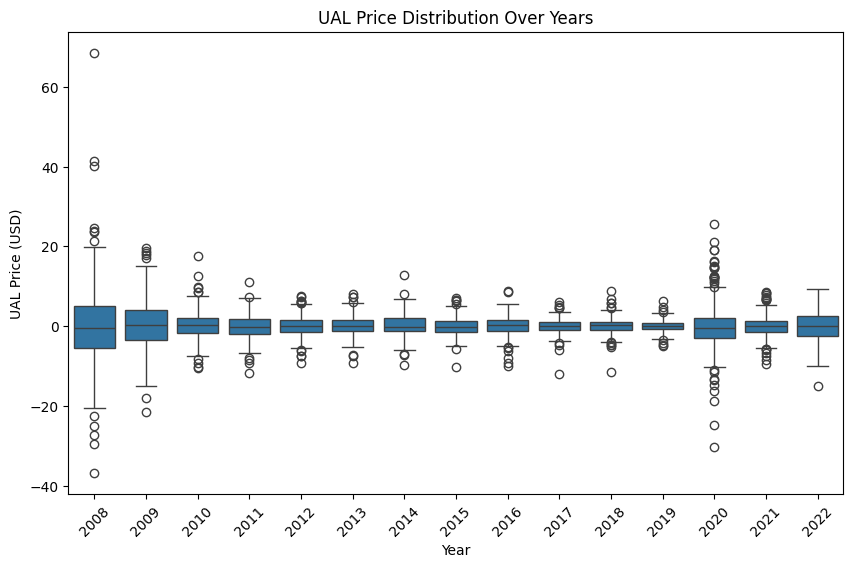

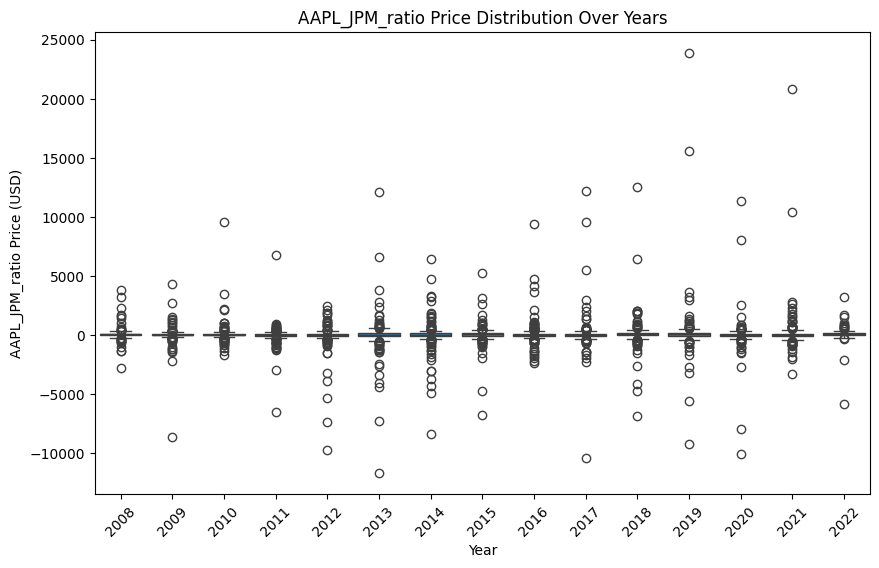

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas para generar gráficas
columns = ['JPM', 'PG', 'UAL', 'AAPL_JPM_ratio']

# Generar gráficos para cada columna agrupados por el año
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Year', y=column, data=df)
    plt.title(f"{column} Price Distribution Over Years")
    plt.xlabel("Year")
    plt.ylabel(f"{column} Price (USD)")
    plt.xticks(rotation=45)  # Rotar etiquetas del eje X si es necesario
    plt.show()



In [48]:
df['Date_numeric'] = df['Date'].map(pd.Timestamp.toordinal)


<Figure size 1000x600 with 0 Axes>

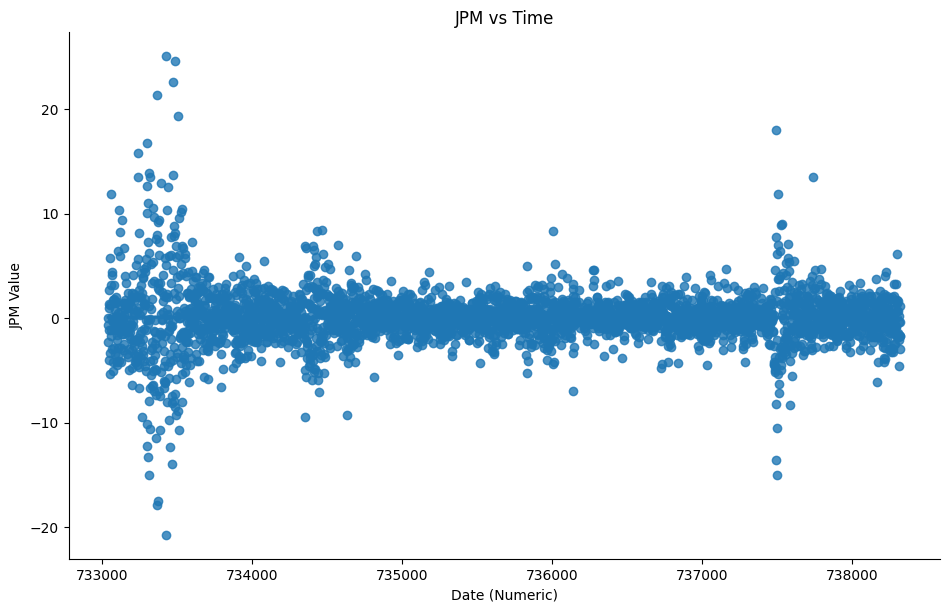

<Figure size 1000x600 with 0 Axes>

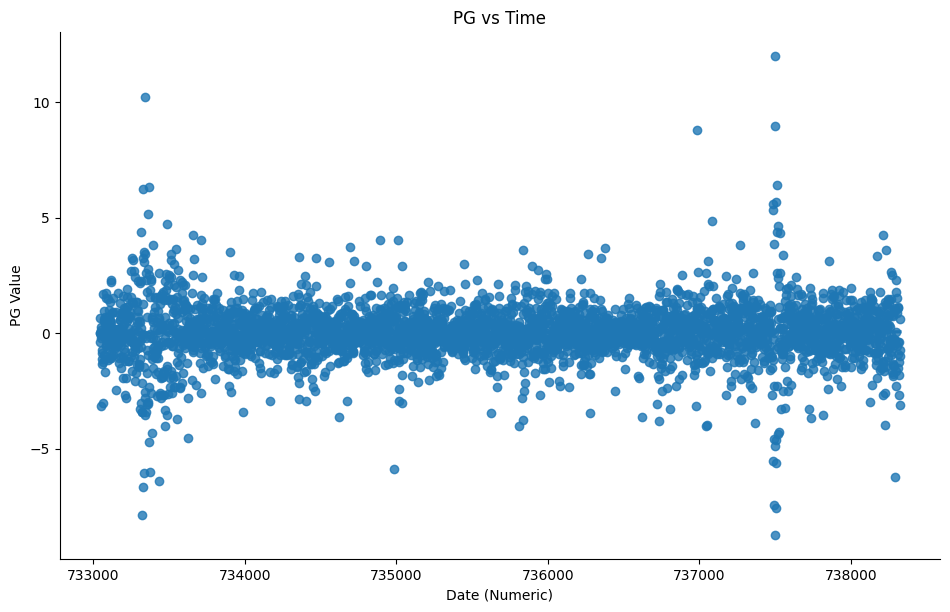

<Figure size 1000x600 with 0 Axes>

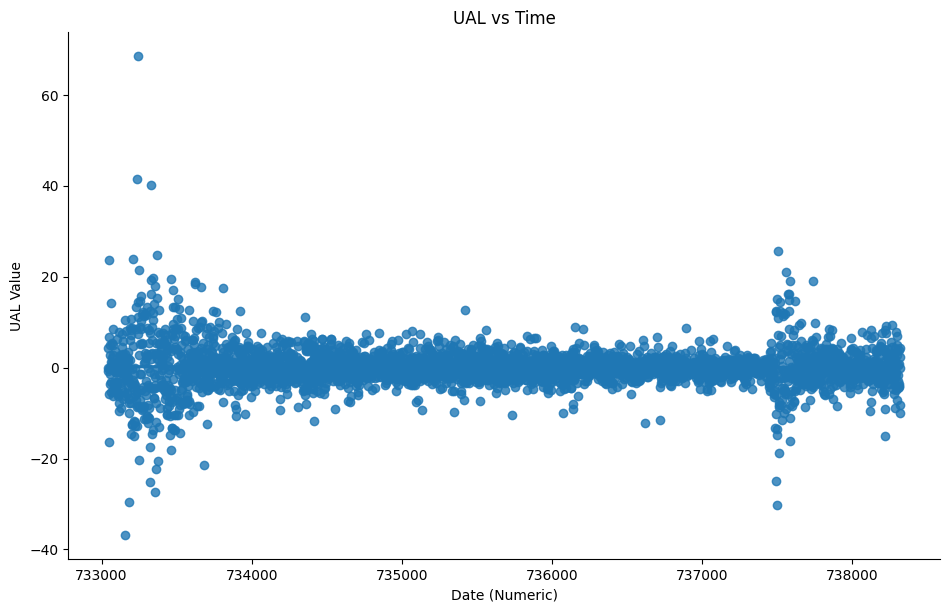

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<Figure size 1000x600 with 0 Axes>

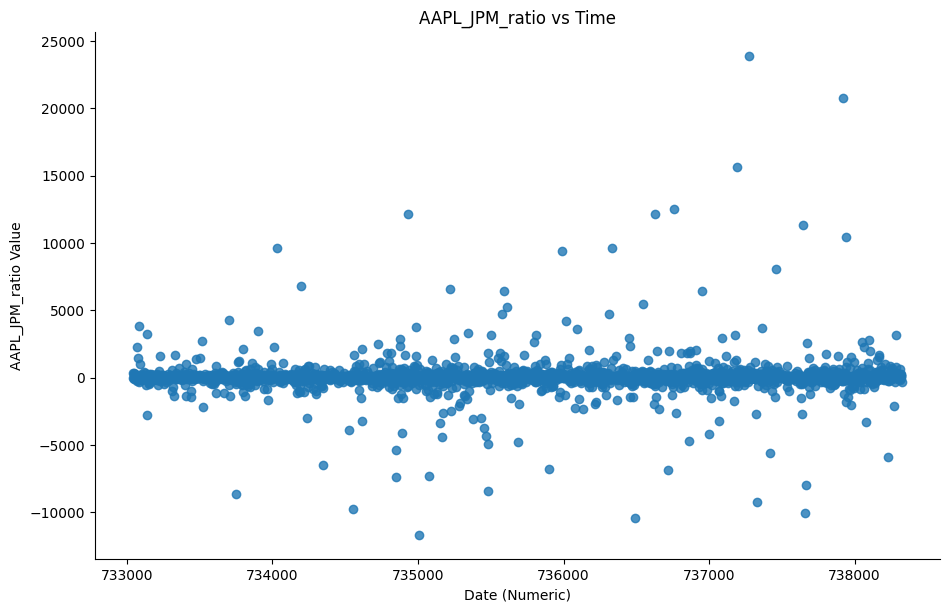

In [49]:
# Lista de columnas para graficar
columns = ['JPM', 'PG', 'UAL', 'AAPL_JPM_ratio']

# Iterar sobre cada columna para crear una gráfica
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.lmplot(x="Date_numeric", y=column, data=df, aspect=1.6, palette="viridis", height=6)
    plt.title(f"{column} vs Time")
    plt.xlabel("Date (Numeric)")
    plt.ylabel(f"{column} Value")
    plt.show()
